[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/08_Dropout_Classification.ipynb)

# Dropout Compare by Using CIFAR-10 dataset for classification

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.misc import toimage
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [69]:
!pip install keras_sequential_ascii


Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.layers import Activation

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout

import tensorflow as tf
import multiprocessing as mp

from keras.datasets import cifar10

## 1. Data prepocessing 

In [0]:
batch_size = 128
num_classes = 10
epochs = 100

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

### Plot with 10 random images from dataset

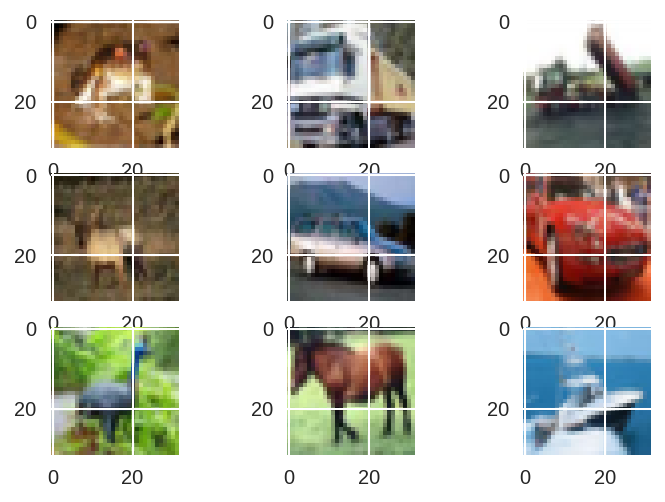

In [75]:
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(toimage(x_train[i]))
# show the plot
plt.show()

In [0]:
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Building a CNN with 6 Layers

In [0]:
dropouts = [0.0, 0.2, 0.5]

In [0]:
def model(dropout):
 
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=x_train.shape[1:])) 
  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout))
    
  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout))
  
  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
  
  model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))
 
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  
  return model

### For the Dropout = 0

In [81]:
start = time.time()
model_1 = model(dropouts[0])
model_1_history=model_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)


print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 480us/step - loss: 1.6900 - acc: 0.3644 - val_loss: 1.3174 - val_acc: 0.5140
Epoch 2/100
19328/50000 [==========>...................] - ETA: 12s - loss: 1.3073 - acc: 0.5158

50000/50000 [==============================] - 22s 441us/step - loss: 1.2100 - acc: 0.5585 - val_loss: 1.1338 - val_acc: 0.5870
Epoch 3/100
45824/50000 [==========================>...] - ETA: 1s - loss: 0.9598 - acc: 0.6550

50000/50000 [==============================] - 22s 443us/step - loss: 0.9541 - acc: 0.6568 - val_loss: 0.9497 - val_acc: 0.6722
Epoch 4/100
50000/50000 [==============================] - 22s 443us/step - loss: 0.7804 - acc: 0.7247 - val_loss: 0.7946 - val_acc: 0.7258
Epoch 5/100
 3456/50000 [=>............................] - ETA: 19s - loss: 0.6394 - acc: 0.7749

50000/50000 [==============================] - 22s 442us/step - loss: 0.6609 - acc: 0.7676 - val_loss: 0.7465 - val_acc: 0.7430
Epoch 6/100
40320/50000 [=======================>......] - ETA: 4s - loss: 0.5501 - acc: 0.8066

50000/50000 [==============================] - 22s 442us/step - loss: 0.5524 - acc: 0.8062 - val_loss: 0.7791 - val_acc: 0.7428
Epoch 7/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.4639 - acc: 0.8366 - val_loss: 0.7044 - val_acc: 0.7726
Epoch 8/100
 2176/50000 [>.............................] - ETA: 20s - loss: 0.3408 - acc: 0.8833

50000/50000 [==============================] - 22s 444us/step - loss: 0.3889 - acc: 0.8632 - val_loss: 0.7465 - val_acc: 0.7606
Epoch 9/100
39424/50000 [======================>.......] - ETA: 4s - loss: 0.3123 - acc: 0.8902

50000/50000 [==============================] - 22s 442us/step - loss: 0.3171 - acc: 0.8884 - val_loss: 0.7936 - val_acc: 0.7749
Epoch 10/100
50000/50000 [==============================] - 22s 443us/step - loss: 0.2605 - acc: 0.9079 - val_loss: 0.8022 - val_acc: 0.7632
Epoch 11/100
 1920/50000 [>.............................] - ETA: 20s - loss: 0.1740 - acc: 0.9432

50000/50000 [==============================] - 22s 442us/step - loss: 0.2109 - acc: 0.9267 - val_loss: 0.9805 - val_acc: 0.7497
Epoch 12/100
39424/50000 [======================>.......] - ETA: 4s - loss: 0.1815 - acc: 0.9360

50000/50000 [==============================] - 22s 437us/step - loss: 0.1878 - acc: 0.9331 - val_loss: 0.9203 - val_acc: 0.7683
Epoch 13/100
50000/50000 [==============================] - 22s 439us/step - loss: 0.1538 - acc: 0.9449 - val_loss: 0.9934 - val_acc: 0.7700
Epoch 14/100
 2176/50000 [>.............................] - ETA: 19s - loss: 0.1154 - acc: 0.9619

50000/50000 [==============================] - 22s 442us/step - loss: 0.1444 - acc: 0.9503 - val_loss: 1.0400 - val_acc: 0.7695
Epoch 15/100
39680/50000 [======================>.......] - ETA: 4s - loss: 0.1155 - acc: 0.9591

50000/50000 [==============================] - 22s 437us/step - loss: 0.1171 - acc: 0.9591 - val_loss: 1.1180 - val_acc: 0.7739
Epoch 16/100
50000/50000 [==============================] - 22s 438us/step - loss: 0.1243 - acc: 0.9569 - val_loss: 1.1313 - val_acc: 0.7712
Epoch 17/100
 2304/50000 [>.............................] - ETA: 19s - loss: 0.0865 - acc: 0.9709

50000/50000 [==============================] - 22s 438us/step - loss: 0.0949 - acc: 0.9680 - val_loss: 1.2102 - val_acc: 0.7679
Epoch 18/100
39168/50000 [======================>.......] - ETA: 4s - loss: 0.0958 - acc: 0.9677

50000/50000 [==============================] - 22s 441us/step - loss: 0.0993 - acc: 0.9662 - val_loss: 1.2036 - val_acc: 0.7829
Epoch 19/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.0915 - acc: 0.9688 - val_loss: 1.1385 - val_acc: 0.7667
Epoch 20/100
 1920/50000 [>.............................] - ETA: 20s - loss: 0.0737 - acc: 0.9797

50000/50000 [==============================] - 22s 439us/step - loss: 0.0821 - acc: 0.9721 - val_loss: 1.2379 - val_acc: 0.7783
Epoch 21/100
39808/50000 [======================>.......] - ETA: 4s - loss: 0.0879 - acc: 0.9706

50000/50000 [==============================] - 22s 440us/step - loss: 0.0920 - acc: 0.9691 - val_loss: 1.2872 - val_acc: 0.7677
Epoch 22/100
50000/50000 [==============================] - 22s 442us/step - loss: 0.0817 - acc: 0.9722 - val_loss: 1.2142 - val_acc: 0.7677
Epoch 23/100
 1920/50000 [>.............................] - ETA: 20s - loss: 0.0755 - acc: 0.9745

50000/50000 [==============================] - 22s 439us/step - loss: 0.0806 - acc: 0.9725 - val_loss: 1.3013 - val_acc: 0.7627
Epoch 24/100
39552/50000 [======================>.......] - ETA: 4s - loss: 0.0711 - acc: 0.9758

50000/50000 [==============================] - 22s 440us/step - loss: 0.0745 - acc: 0.9748 - val_loss: 1.2338 - val_acc: 0.7672
Epoch 25/100
50000/50000 [==============================] - 22s 439us/step - loss: 0.0761 - acc: 0.9749 - val_loss: 1.2241 - val_acc: 0.7624
Epoch 26/100
 2304/50000 [>.............................] - ETA: 20s - loss: 0.0855 - acc: 0.9740

50000/50000 [==============================] - 22s 443us/step - loss: 0.0655 - acc: 0.9782 - val_loss: 1.2645 - val_acc: 0.7723
Epoch 27/100
39424/50000 [======================>.......] - ETA: 4s - loss: 0.0754 - acc: 0.9757

50000/50000 [==============================] - 22s 444us/step - loss: 0.0739 - acc: 0.9761 - val_loss: 1.2810 - val_acc: 0.7729
Epoch 28/100
50000/50000 [==============================] - 22s 440us/step - loss: 0.0699 - acc: 0.9765 - val_loss: 1.2847 - val_acc: 0.7762
Epoch 29/100
 1920/50000 [>.............................] - ETA: 20s - loss: 0.0645 - acc: 0.9797

50000/50000 [==============================] - 22s 442us/step - loss: 0.0655 - acc: 0.9784 - val_loss: 1.3132 - val_acc: 0.7772
Epoch 30/100
39296/50000 [======================>.......] - ETA: 4s - loss: 0.0622 - acc: 0.9798

50000/50000 [==============================] - 22s 442us/step - loss: 0.0660 - acc: 0.9786 - val_loss: 1.2553 - val_acc: 0.7709
Epoch 31/100
50000/50000 [==============================] - 22s 440us/step - loss: 0.0591 - acc: 0.9799 - val_loss: 1.2909 - val_acc: 0.7700
Epoch 32/100
 2048/50000 [>.............................] - ETA: 20s - loss: 0.0553 - acc: 0.9819

50000/50000 [==============================] - 22s 442us/step - loss: 0.0695 - acc: 0.9772 - val_loss: 1.3348 - val_acc: 0.7747
Epoch 33/100
39040/50000 [======================>.......] - ETA: 4s - loss: 0.0570 - acc: 0.9819

50000/50000 [==============================] - 22s 440us/step - loss: 0.0578 - acc: 0.9816 - val_loss: 1.4380 - val_acc: 0.7794
Epoch 34/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.0596 - acc: 0.9803 - val_loss: 1.2702 - val_acc: 0.7680
Epoch 35/100
 1792/50000 [>.............................] - ETA: 20s - loss: 0.0482 - acc: 0.9821

50000/50000 [==============================] - 22s 442us/step - loss: 0.0659 - acc: 0.9785 - val_loss: 1.2087 - val_acc: 0.7704
Epoch 36/100
39296/50000 [======================>.......] - ETA: 4s - loss: 0.0606 - acc: 0.9800

50000/50000 [==============================] - 22s 440us/step - loss: 0.0636 - acc: 0.9791 - val_loss: 1.3958 - val_acc: 0.7667
Epoch 37/100
50000/50000 [==============================] - 22s 438us/step - loss: 0.0543 - acc: 0.9820 - val_loss: 1.3861 - val_acc: 0.7750
Epoch 38/100
 2048/50000 [>.............................] - ETA: 20s - loss: 0.0519 - acc: 0.9849

50000/50000 [==============================] - 22s 442us/step - loss: 0.0608 - acc: 0.9808 - val_loss: 1.4085 - val_acc: 0.7804
Epoch 39/100
40064/50000 [=======================>......] - ETA: 4s - loss: 0.0644 - acc: 0.9790

50000/50000 [==============================] - 22s 435us/step - loss: 0.0661 - acc: 0.9785 - val_loss: 1.3501 - val_acc: 0.7714
Epoch 40/100
50000/50000 [==============================] - 22s 440us/step - loss: 0.0502 - acc: 0.9841 - val_loss: 1.4635 - val_acc: 0.7638
Epoch 41/100
 2304/50000 [>.............................] - ETA: 19s - loss: 0.0345 - acc: 0.9900

50000/50000 [==============================] - 22s 439us/step - loss: 0.0574 - acc: 0.9825 - val_loss: 1.3313 - val_acc: 0.7701
Epoch 42/100
40064/50000 [=======================>......] - ETA: 4s - loss: 0.0492 - acc: 0.9839

50000/50000 [==============================] - 22s 435us/step - loss: 0.0507 - acc: 0.9834 - val_loss: 1.4443 - val_acc: 0.7649
Epoch 43/100
50000/50000 [==============================] - 22s 438us/step - loss: 0.0626 - acc: 0.9797 - val_loss: 1.3760 - val_acc: 0.7759
Epoch 44/100
 2048/50000 [>.............................] - ETA: 19s - loss: 0.0327 - acc: 0.9897

50000/50000 [==============================] - 22s 437us/step - loss: 0.0523 - acc: 0.9837 - val_loss: 1.3093 - val_acc: 0.7695
Epoch 45/100
39680/50000 [======================>.......] - ETA: 4s - loss: 0.0544 - acc: 0.9829

50000/50000 [==============================] - 22s 435us/step - loss: 0.0586 - acc: 0.9817 - val_loss: 1.4088 - val_acc: 0.7708
Epoch 46/100
50000/50000 [==============================] - 22s 438us/step - loss: 0.0538 - acc: 0.9834 - val_loss: 1.3960 - val_acc: 0.7752
Epoch 47/100
 2560/50000 [>.............................] - ETA: 19s - loss: 0.0340 - acc: 0.9895

50000/50000 [==============================] - 22s 437us/step - loss: 0.0585 - acc: 0.9818 - val_loss: 1.3593 - val_acc: 0.7783
Epoch 48/100
40192/50000 [=======================>......] - ETA: 4s - loss: 0.0458 - acc: 0.9854

50000/50000 [==============================] - 22s 439us/step - loss: 0.0477 - acc: 0.9848 - val_loss: 1.5822 - val_acc: 0.7690
Epoch 49/100
50000/50000 [==============================] - 22s 439us/step - loss: 0.0628 - acc: 0.9806 - val_loss: 1.4182 - val_acc: 0.7660
Epoch 50/100
 2048/50000 [>.............................] - ETA: 20s - loss: 0.0403 - acc: 0.9873

50000/50000 [==============================] - 22s 438us/step - loss: 0.0537 - acc: 0.9830 - val_loss: 1.3831 - val_acc: 0.7644
Epoch 51/100
39936/50000 [======================>.......] - ETA: 4s - loss: 0.0431 - acc: 0.9866

50000/50000 [==============================] - 22s 438us/step - loss: 0.0461 - acc: 0.9857 - val_loss: 1.4517 - val_acc: 0.7676
Epoch 52/100
50000/50000 [==============================] - 22s 438us/step - loss: 0.0549 - acc: 0.9834 - val_loss: 1.4208 - val_acc: 0.7713
Epoch 53/100
 2560/50000 [>.............................] - ETA: 19s - loss: 0.0244 - acc: 0.9930

50000/50000 [==============================] - 22s 438us/step - loss: 0.0471 - acc: 0.9858 - val_loss: 1.3867 - val_acc: 0.7755
Epoch 54/100
39680/50000 [======================>.......] - ETA: 4s - loss: 0.0516 - acc: 0.9846

50000/50000 [==============================] - 22s 440us/step - loss: 0.0526 - acc: 0.9841 - val_loss: 1.3959 - val_acc: 0.7717
Epoch 55/100
50000/50000 [==============================] - 22s 439us/step - loss: 0.0519 - acc: 0.9848 - val_loss: 1.5046 - val_acc: 0.7759
Epoch 56/100
 2560/50000 [>.............................] - ETA: 19s - loss: 0.0294 - acc: 0.9902

50000/50000 [==============================] - 22s 438us/step - loss: 0.0499 - acc: 0.9845 - val_loss: 1.4572 - val_acc: 0.7838
Epoch 57/100
40192/50000 [=======================>......] - ETA: 4s - loss: 0.0504 - acc: 0.9846

50000/50000 [==============================] - 22s 440us/step - loss: 0.0524 - acc: 0.9838 - val_loss: 1.4010 - val_acc: 0.7693
Epoch 58/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.0381 - acc: 0.9882 - val_loss: 1.5238 - val_acc: 0.7772
Epoch 59/100
 2304/50000 [>.............................] - ETA: 19s - loss: 0.0428 - acc: 0.9865

50000/50000 [==============================] - 22s 441us/step - loss: 0.0502 - acc: 0.9854 - val_loss: 1.5176 - val_acc: 0.7745
Epoch 60/100
39424/50000 [======================>.......] - ETA: 4s - loss: 0.0547 - acc: 0.9839

50000/50000 [==============================] - 22s 444us/step - loss: 0.0566 - acc: 0.9832 - val_loss: 1.4298 - val_acc: 0.7652
Epoch 61/100
50000/50000 [==============================] - 22s 444us/step - loss: 0.0531 - acc: 0.9842 - val_loss: 1.4334 - val_acc: 0.7764
Epoch 62/100
 1920/50000 [>.............................] - ETA: 19s - loss: 0.0344 - acc: 0.9885

50000/50000 [==============================] - 22s 442us/step - loss: 0.0339 - acc: 0.9904 - val_loss: 1.5216 - val_acc: 0.7714
Epoch 63/100
39552/50000 [======================>.......] - ETA: 4s - loss: 0.0365 - acc: 0.9885

50000/50000 [==============================] - 22s 442us/step - loss: 0.0405 - acc: 0.9876 - val_loss: 1.6558 - val_acc: 0.7552
Epoch 64/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.0481 - acc: 0.9855 - val_loss: 1.5060 - val_acc: 0.7684
Epoch 65/100
 2176/50000 [>.............................] - ETA: 20s - loss: 0.0582 - acc: 0.9839

50000/50000 [==============================] - 22s 439us/step - loss: 0.0516 - acc: 0.9843 - val_loss: 1.4284 - val_acc: 0.7696
Epoch 66/100
39680/50000 [======================>.......] - ETA: 4s - loss: 0.0372 - acc: 0.9889

50000/50000 [==============================] - 22s 440us/step - loss: 0.0458 - acc: 0.9866 - val_loss: 1.5728 - val_acc: 0.7561
Epoch 67/100
50000/50000 [==============================] - 22s 439us/step - loss: 0.0477 - acc: 0.9853 - val_loss: 1.6626 - val_acc: 0.7689
Epoch 68/100
 2048/50000 [>.............................] - ETA: 19s - loss: 0.0335 - acc: 0.9907

50000/50000 [==============================] - 22s 439us/step - loss: 0.0363 - acc: 0.9892 - val_loss: 1.5954 - val_acc: 0.7757
Epoch 69/100
39168/50000 [======================>.......] - ETA: 4s - loss: 0.0556 - acc: 0.9840

50000/50000 [==============================] - 22s 441us/step - loss: 0.0534 - acc: 0.9844 - val_loss: 1.5585 - val_acc: 0.7779
Epoch 70/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.0468 - acc: 0.9859 - val_loss: 1.5667 - val_acc: 0.7783
Epoch 71/100
 1920/50000 [>.............................] - ETA: 19s - loss: 0.0257 - acc: 0.9911

50000/50000 [==============================] - 22s 441us/step - loss: 0.0470 - acc: 0.9863 - val_loss: 1.4264 - val_acc: 0.7778
Epoch 72/100
39552/50000 [======================>.......] - ETA: 4s - loss: 0.0448 - acc: 0.9868

50000/50000 [==============================] - 22s 441us/step - loss: 0.0460 - acc: 0.9867 - val_loss: 1.4659 - val_acc: 0.7656
Epoch 73/100
50000/50000 [==============================] - 22s 440us/step - loss: 0.0517 - acc: 0.9850 - val_loss: 1.4633 - val_acc: 0.7753
Epoch 74/100
 2176/50000 [>.............................] - ETA: 19s - loss: 0.0161 - acc: 0.9949

50000/50000 [==============================] - 22s 441us/step - loss: 0.0405 - acc: 0.9878 - val_loss: 1.5337 - val_acc: 0.7718
Epoch 75/100
39168/50000 [======================>.......] - ETA: 4s - loss: 0.0437 - acc: 0.9869

50000/50000 [==============================] - 22s 442us/step - loss: 0.0447 - acc: 0.9869 - val_loss: 1.3602 - val_acc: 0.7753
Epoch 76/100
50000/50000 [==============================] - 22s 440us/step - loss: 0.0423 - acc: 0.9876 - val_loss: 1.4091 - val_acc: 0.7754
Epoch 77/100
 1920/50000 [>.............................] - ETA: 20s - loss: 0.0337 - acc: 0.9896

50000/50000 [==============================] - 22s 438us/step - loss: 0.0400 - acc: 0.9881 - val_loss: 1.4513 - val_acc: 0.7759
Epoch 78/100
40064/50000 [=======================>......] - ETA: 4s - loss: 0.0461 - acc: 0.9866

50000/50000 [==============================] - 22s 435us/step - loss: 0.0479 - acc: 0.9862 - val_loss: 1.4938 - val_acc: 0.7712
Epoch 79/100
50000/50000 [==============================] - 22s 436us/step - loss: 0.0423 - acc: 0.9882 - val_loss: 1.5447 - val_acc: 0.7699
Epoch 80/100
 2560/50000 [>.............................] - ETA: 20s - loss: 0.0609 - acc: 0.9859

50000/50000 [==============================] - 22s 441us/step - loss: 0.0476 - acc: 0.9870 - val_loss: 1.5586 - val_acc: 0.7676
Epoch 81/100
39808/50000 [======================>.......] - ETA: 4s - loss: 0.0402 - acc: 0.9885

50000/50000 [==============================] - 22s 437us/step - loss: 0.0403 - acc: 0.9887 - val_loss: 1.5495 - val_acc: 0.7701
Epoch 82/100
50000/50000 [==============================] - 22s 438us/step - loss: 0.0477 - acc: 0.9867 - val_loss: 1.4921 - val_acc: 0.7724
Epoch 83/100
 2304/50000 [>.............................] - ETA: 20s - loss: 0.0356 - acc: 0.9918

50000/50000 [==============================] - 22s 439us/step - loss: 0.0391 - acc: 0.9888 - val_loss: 1.4878 - val_acc: 0.7770
Epoch 84/100
39424/50000 [======================>.......] - ETA: 4s - loss: 0.0303 - acc: 0.9913

50000/50000 [==============================] - 22s 442us/step - loss: 0.0333 - acc: 0.9907 - val_loss: 1.5936 - val_acc: 0.7647
Epoch 85/100
50000/50000 [==============================] - 22s 442us/step - loss: 0.0358 - acc: 0.9902 - val_loss: 1.5418 - val_acc: 0.7785
Epoch 86/100
 1664/50000 [..............................] - ETA: 20s - loss: 0.0367 - acc: 0.9892

50000/50000 [==============================] - 22s 442us/step - loss: 0.0399 - acc: 0.9884 - val_loss: 1.5352 - val_acc: 0.7719
Epoch 87/100
39040/50000 [======================>.......] - ETA: 4s - loss: 0.0448 - acc: 0.9885

50000/50000 [==============================] - 22s 445us/step - loss: 0.0411 - acc: 0.9893 - val_loss: 1.5587 - val_acc: 0.7762
Epoch 88/100
50000/50000 [==============================] - 22s 444us/step - loss: 0.0483 - acc: 0.9869 - val_loss: 1.5096 - val_acc: 0.7724
Epoch 89/100
 1664/50000 [..............................] - ETA: 19s - loss: 0.0456 - acc: 0.9910

50000/50000 [==============================] - 22s 436us/step - loss: 0.0466 - acc: 0.9873 - val_loss: 1.3877 - val_acc: 0.7723
Epoch 90/100
39552/50000 [======================>.......] - ETA: 4s - loss: 0.0334 - acc: 0.9900

50000/50000 [==============================] - 22s 441us/step - loss: 0.0366 - acc: 0.9891 - val_loss: 1.5549 - val_acc: 0.7728
Epoch 91/100
50000/50000 [==============================] - 22s 442us/step - loss: 0.0457 - acc: 0.9877 - val_loss: 1.4839 - val_acc: 0.7607
Epoch 92/100
 1792/50000 [>.............................] - ETA: 20s - loss: 0.0556 - acc: 0.9855

50000/50000 [==============================] - 22s 440us/step - loss: 0.0399 - acc: 0.9891 - val_loss: 1.5386 - val_acc: 0.7778
Epoch 93/100
39296/50000 [======================>.......] - ETA: 4s - loss: 0.0287 - acc: 0.9919

50000/50000 [==============================] - 22s 443us/step - loss: 0.0299 - acc: 0.9913 - val_loss: 1.5808 - val_acc: 0.7730
Epoch 94/100
50000/50000 [==============================] - 22s 440us/step - loss: 0.0332 - acc: 0.9906 - val_loss: 1.4573 - val_acc: 0.7749
Epoch 95/100
 2304/50000 [>.............................] - ETA: 19s - loss: 0.0340 - acc: 0.9905

50000/50000 [==============================] - 22s 442us/step - loss: 0.0512 - acc: 0.9858 - val_loss: 1.4644 - val_acc: 0.7733
Epoch 96/100
39424/50000 [======================>.......] - ETA: 4s - loss: 0.0395 - acc: 0.9889

50000/50000 [==============================] - 22s 439us/step - loss: 0.0395 - acc: 0.9889 - val_loss: 1.6046 - val_acc: 0.7728
Epoch 97/100
50000/50000 [==============================] - 22s 440us/step - loss: 0.0375 - acc: 0.9902 - val_loss: 1.5258 - val_acc: 0.7784
Epoch 98/100
 1920/50000 [>.............................] - ETA: 20s - loss: 0.0328 - acc: 0.9896

50000/50000 [==============================] - 22s 438us/step - loss: 0.0493 - acc: 0.9864 - val_loss: 1.5349 - val_acc: 0.7785
Epoch 99/100
39168/50000 [======================>.......] - ETA: 4s - loss: 0.0417 - acc: 0.9892

50000/50000 [==============================] - 22s 442us/step - loss: 0.0455 - acc: 0.9883 - val_loss: 1.5773 - val_acc: 0.7809
Epoch 100/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.0458 - acc: 0.9879 - val_loss: 1.6657 - val_acc: 0.7748
@ Total Time Spent: 2203.94 seconds


In [82]:
train_loss_1, train_accuracy_1 = model_1.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 98.93 %     loss = 0.044782
Testing Accuracy = 77.48 %    loss = 1.665733


### For the Dropout = 0.2

In [83]:
start = time.time()
model_2 = model(dropouts[1])
model_2_history=model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)

print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 27s 541us/step - loss: 2.1140 - acc: 0.1734 - val_loss: 1.7429 - val_acc: 0.3295
Epoch 2/100
18816/50000 [==========>...................] - ETA: 14s - loss: 1.6957 - acc: 0.3493

50000/50000 [==============================] - 25s 491us/step - loss: 1.5845 - acc: 0.3986 - val_loss: 1.4053 - val_acc: 0.4761
Epoch 3/100
45440/50000 [==========================>...] - ETA: 2s - loss: 1.3242 - acc: 0.5154

50000/50000 [==============================] - 24s 489us/step - loss: 1.3160 - acc: 0.5193 - val_loss: 1.1934 - val_acc: 0.5680
Epoch 4/100
50000/50000 [==============================] - 25s 495us/step - loss: 1.1342 - acc: 0.5912 - val_loss: 1.0119 - val_acc: 0.6367
Epoch 5/100
 3200/50000 [>.............................] - ETA: 21s - loss: 1.0062 - acc: 0.6466

50000/50000 [==============================] - 25s 491us/step - loss: 1.0083 - acc: 0.6409 - val_loss: 0.8931 - val_acc: 0.6873
Epoch 6/100
39552/50000 [======================>.......] - ETA: 4s - loss: 0.9058 - acc: 0.6811

50000/50000 [==============================] - 25s 492us/step - loss: 0.9046 - acc: 0.6823 - val_loss: 0.8382 - val_acc: 0.7134
Epoch 7/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.8319 - acc: 0.7100 - val_loss: 0.7703 - val_acc: 0.7314
Epoch 8/100
 1920/50000 [>.............................] - ETA: 22s - loss: 0.7618 - acc: 0.7318

50000/50000 [==============================] - 25s 496us/step - loss: 0.7718 - acc: 0.7319 - val_loss: 0.7593 - val_acc: 0.7390
Epoch 9/100
39040/50000 [======================>.......] - ETA: 5s - loss: 0.7265 - acc: 0.7462

50000/50000 [==============================] - 25s 495us/step - loss: 0.7241 - acc: 0.7469 - val_loss: 0.7338 - val_acc: 0.7478
Epoch 10/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.6844 - acc: 0.7624 - val_loss: 0.6744 - val_acc: 0.7705
Epoch 11/100
 1664/50000 [..............................] - ETA: 22s - loss: 0.6521 - acc: 0.7746

50000/50000 [==============================] - 25s 495us/step - loss: 0.6474 - acc: 0.7764 - val_loss: 0.6891 - val_acc: 0.7627
Epoch 12/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.6176 - acc: 0.7886

50000/50000 [==============================] - 25s 495us/step - loss: 0.6203 - acc: 0.7884 - val_loss: 0.6828 - val_acc: 0.7690
Epoch 13/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.5950 - acc: 0.7944 - val_loss: 0.6824 - val_acc: 0.7761
Epoch 14/100
 1536/50000 [..............................] - ETA: 23s - loss: 0.5365 - acc: 0.8210

50000/50000 [==============================] - 25s 497us/step - loss: 0.5736 - acc: 0.8033 - val_loss: 0.6366 - val_acc: 0.7886
Epoch 15/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.5433 - acc: 0.8115

50000/50000 [==============================] - 25s 495us/step - loss: 0.5525 - acc: 0.8089 - val_loss: 0.6641 - val_acc: 0.7752
Epoch 16/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.5344 - acc: 0.8146 - val_loss: 0.6044 - val_acc: 0.8013
Epoch 17/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.5281 - acc: 0.8190

50000/50000 [==============================] - 25s 497us/step - loss: 0.5178 - acc: 0.8204 - val_loss: 0.6393 - val_acc: 0.7920
Epoch 18/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.5040 - acc: 0.8252

50000/50000 [==============================] - 25s 493us/step - loss: 0.5041 - acc: 0.8246 - val_loss: 0.6357 - val_acc: 0.7965
Epoch 19/100
50000/50000 [==============================] - 25s 495us/step - loss: 0.4857 - acc: 0.8325 - val_loss: 0.6266 - val_acc: 0.7981
Epoch 20/100
 1536/50000 [..............................] - ETA: 23s - loss: 0.4730 - acc: 0.8359

50000/50000 [==============================] - 25s 496us/step - loss: 0.4768 - acc: 0.8352 - val_loss: 0.6168 - val_acc: 0.8037
Epoch 21/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.4607 - acc: 0.8400

50000/50000 [==============================] - 25s 501us/step - loss: 0.4597 - acc: 0.8404 - val_loss: 0.6124 - val_acc: 0.8069
Epoch 22/100
50000/50000 [==============================] - 25s 500us/step - loss: 0.4563 - acc: 0.8419 - val_loss: 0.7126 - val_acc: 0.7864
Epoch 23/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.4577 - acc: 0.8470

50000/50000 [==============================] - 25s 494us/step - loss: 0.4399 - acc: 0.8465 - val_loss: 0.6483 - val_acc: 0.7968
Epoch 24/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.4244 - acc: 0.8545

50000/50000 [==============================] - 25s 495us/step - loss: 0.4293 - acc: 0.8528 - val_loss: 0.6635 - val_acc: 0.7981
Epoch 25/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.4169 - acc: 0.8542 - val_loss: 0.6619 - val_acc: 0.7963
Epoch 26/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.4388 - acc: 0.8529

50000/50000 [==============================] - 25s 493us/step - loss: 0.4134 - acc: 0.8570 - val_loss: 0.6353 - val_acc: 0.8012
Epoch 27/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.3993 - acc: 0.8612

50000/50000 [==============================] - 25s 496us/step - loss: 0.4068 - acc: 0.8583 - val_loss: 0.6141 - val_acc: 0.8032
Epoch 28/100
50000/50000 [==============================] - 25s 492us/step - loss: 0.3922 - acc: 0.8621 - val_loss: 0.6075 - val_acc: 0.8098
Epoch 29/100
 1536/50000 [..............................] - ETA: 23s - loss: 0.3458 - acc: 0.8717

50000/50000 [==============================] - 25s 492us/step - loss: 0.3875 - acc: 0.8653 - val_loss: 0.6194 - val_acc: 0.8147
Epoch 30/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.3807 - acc: 0.8683

50000/50000 [==============================] - 25s 494us/step - loss: 0.3842 - acc: 0.8671 - val_loss: 0.6597 - val_acc: 0.8027
Epoch 31/100
50000/50000 [==============================] - 25s 498us/step - loss: 0.3723 - acc: 0.8711 - val_loss: 0.6649 - val_acc: 0.8068
Epoch 32/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.3648 - acc: 0.8698

50000/50000 [==============================] - 25s 501us/step - loss: 0.3695 - acc: 0.8723 - val_loss: 0.6335 - val_acc: 0.8132
Epoch 33/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.3651 - acc: 0.8733

50000/50000 [==============================] - 25s 495us/step - loss: 0.3652 - acc: 0.8745 - val_loss: 0.6406 - val_acc: 0.8110
Epoch 34/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.3640 - acc: 0.8760 - val_loss: 0.6221 - val_acc: 0.8072
Epoch 35/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.4018 - acc: 0.8620

50000/50000 [==============================] - 25s 493us/step - loss: 0.3581 - acc: 0.8780 - val_loss: 0.6262 - val_acc: 0.8120
Epoch 36/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.3451 - acc: 0.8806

50000/50000 [==============================] - 25s 493us/step - loss: 0.3434 - acc: 0.8808 - val_loss: 0.6486 - val_acc: 0.8063
Epoch 37/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.3454 - acc: 0.8807 - val_loss: 0.6409 - val_acc: 0.8135
Epoch 38/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.3593 - acc: 0.8750

50000/50000 [==============================] - 25s 495us/step - loss: 0.3388 - acc: 0.8828 - val_loss: 0.7049 - val_acc: 0.8105
Epoch 39/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.3287 - acc: 0.8881

50000/50000 [==============================] - 25s 496us/step - loss: 0.3323 - acc: 0.8870 - val_loss: 0.6498 - val_acc: 0.8139
Epoch 40/100
50000/50000 [==============================] - 25s 495us/step - loss: 0.3319 - acc: 0.8858 - val_loss: 0.6783 - val_acc: 0.8071
Epoch 41/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.3657 - acc: 0.8757

50000/50000 [==============================] - 25s 494us/step - loss: 0.3271 - acc: 0.8859 - val_loss: 0.6600 - val_acc: 0.8117
Epoch 42/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.3166 - acc: 0.8892

50000/50000 [==============================] - 25s 496us/step - loss: 0.3219 - acc: 0.8884 - val_loss: 0.7073 - val_acc: 0.7996
Epoch 43/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.3203 - acc: 0.8910 - val_loss: 0.6605 - val_acc: 0.8118
Epoch 44/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2823 - acc: 0.9069

50000/50000 [==============================] - 25s 494us/step - loss: 0.3097 - acc: 0.8934 - val_loss: 0.6678 - val_acc: 0.8149
Epoch 45/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.3080 - acc: 0.8950

50000/50000 [==============================] - 25s 496us/step - loss: 0.3118 - acc: 0.8933 - val_loss: 0.6849 - val_acc: 0.8162
Epoch 46/100
50000/50000 [==============================] - 25s 493us/step - loss: 0.3152 - acc: 0.8928 - val_loss: 0.6746 - val_acc: 0.8124
Epoch 47/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.3042 - acc: 0.9023

50000/50000 [==============================] - 25s 494us/step - loss: 0.3156 - acc: 0.8924 - val_loss: 0.6757 - val_acc: 0.8154
Epoch 48/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.3020 - acc: 0.8968

50000/50000 [==============================] - 25s 495us/step - loss: 0.3061 - acc: 0.8952 - val_loss: 0.6814 - val_acc: 0.8052
Epoch 49/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.2974 - acc: 0.8972 - val_loss: 0.6677 - val_acc: 0.8203
Epoch 50/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2878 - acc: 0.9030

50000/50000 [==============================] - 25s 493us/step - loss: 0.2984 - acc: 0.8992 - val_loss: 0.6596 - val_acc: 0.8156
Epoch 51/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2940 - acc: 0.9011

50000/50000 [==============================] - 25s 497us/step - loss: 0.2968 - acc: 0.8998 - val_loss: 0.6603 - val_acc: 0.8139
Epoch 52/100
50000/50000 [==============================] - 25s 495us/step - loss: 0.2917 - acc: 0.9009 - val_loss: 0.7246 - val_acc: 0.8131
Epoch 53/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2486 - acc: 0.9225

50000/50000 [==============================] - 25s 493us/step - loss: 0.2934 - acc: 0.9016 - val_loss: 0.6859 - val_acc: 0.8181
Epoch 54/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2900 - acc: 0.9027

50000/50000 [==============================] - 25s 498us/step - loss: 0.2943 - acc: 0.9015 - val_loss: 0.6690 - val_acc: 0.8182
Epoch 55/100
50000/50000 [==============================] - 25s 494us/step - loss: 0.2905 - acc: 0.9026 - val_loss: 0.6843 - val_acc: 0.8166
Epoch 56/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2699 - acc: 0.9049

50000/50000 [==============================] - 25s 496us/step - loss: 0.2858 - acc: 0.9034 - val_loss: 0.6822 - val_acc: 0.8118
Epoch 57/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2744 - acc: 0.9083

50000/50000 [==============================] - 25s 495us/step - loss: 0.2807 - acc: 0.9064 - val_loss: 0.6810 - val_acc: 0.8155
Epoch 58/100
50000/50000 [==============================] - 25s 498us/step - loss: 0.2912 - acc: 0.9013 - val_loss: 0.6706 - val_acc: 0.8170
Epoch 59/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.3033 - acc: 0.8932

50000/50000 [==============================] - 25s 494us/step - loss: 0.2799 - acc: 0.9045 - val_loss: 0.6977 - val_acc: 0.8147
Epoch 60/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2686 - acc: 0.9097

50000/50000 [==============================] - 25s 496us/step - loss: 0.2751 - acc: 0.9074 - val_loss: 0.6970 - val_acc: 0.8204
Epoch 61/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.2754 - acc: 0.9062 - val_loss: 0.7335 - val_acc: 0.8194
Epoch 62/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2655 - acc: 0.9154

50000/50000 [==============================] - 25s 496us/step - loss: 0.2728 - acc: 0.9088 - val_loss: 0.7459 - val_acc: 0.8073
Epoch 63/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2791 - acc: 0.9063

50000/50000 [==============================] - 25s 499us/step - loss: 0.2802 - acc: 0.9064 - val_loss: 0.7267 - val_acc: 0.8152
Epoch 64/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.2708 - acc: 0.9099 - val_loss: 0.6997 - val_acc: 0.8255
Epoch 65/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2531 - acc: 0.9108

50000/50000 [==============================] - 25s 493us/step - loss: 0.2702 - acc: 0.9099 - val_loss: 0.6628 - val_acc: 0.8234
Epoch 66/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2566 - acc: 0.9149

50000/50000 [==============================] - 25s 494us/step - loss: 0.2633 - acc: 0.9126 - val_loss: 0.6902 - val_acc: 0.8176
Epoch 67/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.2664 - acc: 0.9121 - val_loss: 0.7389 - val_acc: 0.8159
Epoch 68/100
 1536/50000 [..............................] - ETA: 23s - loss: 0.2632 - acc: 0.9121

50000/50000 [==============================] - 24s 490us/step - loss: 0.2602 - acc: 0.9128 - val_loss: 0.7186 - val_acc: 0.8171
Epoch 69/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2689 - acc: 0.9094

50000/50000 [==============================] - 25s 495us/step - loss: 0.2725 - acc: 0.9085 - val_loss: 0.7325 - val_acc: 0.8126
Epoch 70/100
50000/50000 [==============================] - 25s 494us/step - loss: 0.2612 - acc: 0.9140 - val_loss: 0.7339 - val_acc: 0.8155
Epoch 71/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2572 - acc: 0.9180

50000/50000 [==============================] - 25s 493us/step - loss: 0.2636 - acc: 0.9136 - val_loss: 0.6832 - val_acc: 0.8174
Epoch 72/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2577 - acc: 0.9138

50000/50000 [==============================] - 24s 489us/step - loss: 0.2640 - acc: 0.9123 - val_loss: 0.7023 - val_acc: 0.8148
Epoch 73/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.2601 - acc: 0.9120 - val_loss: 0.7290 - val_acc: 0.8157
Epoch 74/100
 1536/50000 [..............................] - ETA: 23s - loss: 0.2696 - acc: 0.9089

50000/50000 [==============================] - 25s 496us/step - loss: 0.2528 - acc: 0.9157 - val_loss: 0.6877 - val_acc: 0.8162
Epoch 75/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2563 - acc: 0.9151

50000/50000 [==============================] - 25s 492us/step - loss: 0.2597 - acc: 0.9148 - val_loss: 0.6814 - val_acc: 0.8177
Epoch 76/100
50000/50000 [==============================] - 25s 493us/step - loss: 0.2595 - acc: 0.9135 - val_loss: 0.7356 - val_acc: 0.8125
Epoch 77/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2758 - acc: 0.9095

50000/50000 [==============================] - 25s 495us/step - loss: 0.2566 - acc: 0.9157 - val_loss: 0.7441 - val_acc: 0.8208
Epoch 78/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2517 - acc: 0.9179

50000/50000 [==============================] - 25s 495us/step - loss: 0.2528 - acc: 0.9172 - val_loss: 0.7427 - val_acc: 0.8176
Epoch 79/100
50000/50000 [==============================] - 25s 495us/step - loss: 0.2492 - acc: 0.9190 - val_loss: 0.7016 - val_acc: 0.8194
Epoch 80/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2355 - acc: 0.9193

50000/50000 [==============================] - 25s 496us/step - loss: 0.2517 - acc: 0.9176 - val_loss: 0.7280 - val_acc: 0.8137
Epoch 81/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2403 - acc: 0.9216

50000/50000 [==============================] - 25s 494us/step - loss: 0.2401 - acc: 0.9214 - val_loss: 0.7672 - val_acc: 0.8118
Epoch 82/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.2488 - acc: 0.9200 - val_loss: 0.7339 - val_acc: 0.8167
Epoch 83/100
 1536/50000 [..............................] - ETA: 23s - loss: 0.2480 - acc: 0.9193

50000/50000 [==============================] - 25s 494us/step - loss: 0.2427 - acc: 0.9190 - val_loss: 0.7736 - val_acc: 0.8158
Epoch 84/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2527 - acc: 0.9183

50000/50000 [==============================] - 25s 495us/step - loss: 0.2544 - acc: 0.9176 - val_loss: 0.6966 - val_acc: 0.8170
Epoch 85/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.2520 - acc: 0.9180 - val_loss: 0.7461 - val_acc: 0.8126
Epoch 86/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2970 - acc: 0.9154

50000/50000 [==============================] - 25s 493us/step - loss: 0.2515 - acc: 0.9178 - val_loss: 0.7356 - val_acc: 0.8096
Epoch 87/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2417 - acc: 0.9206

50000/50000 [==============================] - 25s 492us/step - loss: 0.2453 - acc: 0.9196 - val_loss: 0.7054 - val_acc: 0.8171
Epoch 88/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.2441 - acc: 0.9211 - val_loss: 0.7483 - val_acc: 0.8201
Epoch 89/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.1696 - acc: 0.9473

50000/50000 [==============================] - 25s 494us/step - loss: 0.2410 - acc: 0.9212 - val_loss: 0.7327 - val_acc: 0.8182
Epoch 90/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2386 - acc: 0.9225

50000/50000 [==============================] - 25s 497us/step - loss: 0.2397 - acc: 0.9222 - val_loss: 0.7673 - val_acc: 0.8166
Epoch 91/100
50000/50000 [==============================] - 25s 494us/step - loss: 0.2385 - acc: 0.9240 - val_loss: 0.7595 - val_acc: 0.8184
Epoch 92/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2266 - acc: 0.9271

50000/50000 [==============================] - 25s 494us/step - loss: 0.2469 - acc: 0.9202 - val_loss: 0.7259 - val_acc: 0.8168
Epoch 93/100
38656/50000 [======================>.......] - ETA: 5s - loss: 0.2404 - acc: 0.9223

50000/50000 [==============================] - 25s 494us/step - loss: 0.2406 - acc: 0.9222 - val_loss: 0.7905 - val_acc: 0.8121
Epoch 94/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.2530 - acc: 0.9193 - val_loss: 0.7383 - val_acc: 0.8240
Epoch 95/100
 1536/50000 [..............................] - ETA: 23s - loss: 0.2434 - acc: 0.9245

50000/50000 [==============================] - 25s 494us/step - loss: 0.2435 - acc: 0.9214 - val_loss: 0.7404 - val_acc: 0.8188
Epoch 96/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2370 - acc: 0.9233

50000/50000 [==============================] - 25s 493us/step - loss: 0.2356 - acc: 0.9232 - val_loss: 0.7654 - val_acc: 0.8099
Epoch 97/100
50000/50000 [==============================] - 25s 495us/step - loss: 0.2361 - acc: 0.9240 - val_loss: 0.7939 - val_acc: 0.8165
Epoch 98/100
 1536/50000 [..............................] - ETA: 22s - loss: 0.2372 - acc: 0.9251

50000/50000 [==============================] - 25s 492us/step - loss: 0.2407 - acc: 0.9218 - val_loss: 0.7476 - val_acc: 0.8172
Epoch 99/100
38784/50000 [======================>.......] - ETA: 5s - loss: 0.2448 - acc: 0.9207

50000/50000 [==============================] - 25s 496us/step - loss: 0.2459 - acc: 0.9212 - val_loss: 0.7388 - val_acc: 0.8195
Epoch 100/100
50000/50000 [==============================] - 25s 499us/step - loss: 0.2429 - acc: 0.9221 - val_loss: 0.7221 - val_acc: 0.8207
@ Total Time Spent: 2477.99 seconds


In [84]:
train_loss_2, train_accuracy_2 = model_2.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 98.60 %     loss = 0.052868
Testing Accuracy = 82.07 %    loss = 0.722143


### For the Dropout = 0.5

In [85]:
start = time.time()
model_3 = model(dropouts[2])
model_3_history=model_3.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)


print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 25s - loss: 1.9994 - acc: 0.2222 - val_loss: 1.7003 - val_acc: 0.3699
Epoch 2/100
 - 23s - loss: 1.6416 - acc: 0.3762 - val_loss: 1.5139 - val_acc: 0.4431
Epoch 3/100
 - 23s - loss: 1.4849 - acc: 0.4497 - val_loss: 1.2986 - val_acc: 0.5131
Epoch 4/100
 - 23s - loss: 1.3612 - acc: 0.5012 - val_loss: 1.4487 - val_acc: 0.4954
Epoch 5/100
 - 23s - loss: 1.2865 - acc: 0.5376 - val_loss: 1.1937 - val_acc: 0.5709
Epoch 6/100
 - 23s - loss: 1.2036 - acc: 0.5710 - val_loss: 1.3032 - val_acc: 0.5526
Epoch 7/100
 - 23s - loss: 1.1526 - acc: 0.5911 - val_loss: 1.1248 - val_acc: 0.6085
Epoch 8/100
 - 23s - loss: 1.1165 - acc: 0.6067 - val_loss: 0.9762 - val_acc: 0.6557
Epoch 9/100
 - 23s - loss: 1.0852 - acc: 0.6208 - val_loss: 0.9954 - val_acc: 0.6501
Epoch 10/100
 - 23s - loss: 1.0544 - acc: 0.6297 - val_loss: 1.0567 - val_acc: 0.6294
Epoch 11/100
 - 23s - loss: 1.0256 - acc: 0.6412 - val_loss: 0.9090 - val_acc: 0.6773
Epoch 12/100


 - 23s - loss: 0.8226 - acc: 0.7250 - val_loss: 0.8427 - val_acc: 0.7133
Epoch 35/100
 - 23s - loss: 0.8224 - acc: 0.7219 - val_loss: 0.7952 - val_acc: 0.7335
Epoch 36/100
 - 23s - loss: 0.8204 - acc: 0.7216 - val_loss: 0.7415 - val_acc: 0.7515
Epoch 37/100
 - 23s - loss: 0.8198 - acc: 0.7235 - val_loss: 0.8481 - val_acc: 0.7224
Epoch 38/100
 - 23s - loss: 0.8161 - acc: 0.7245 - val_loss: 0.7168 - val_acc: 0.7574
Epoch 39/100
 - 23s - loss: 0.8112 - acc: 0.7259 - val_loss: 0.8192 - val_acc: 0.7336
Epoch 40/100
 - 23s - loss: 0.8083 - acc: 0.7288 - val_loss: 0.7569 - val_acc: 0.7439
Epoch 41/100
 - 23s - loss: 0.8151 - acc: 0.7261 - val_loss: 0.6867 - val_acc: 0.7691
Epoch 42/100
 - 23s - loss: 0.8063 - acc: 0.7274 - val_loss: 0.7490 - val_acc: 0.7510
Epoch 43/100
 - 23s - loss: 0.8122 - acc: 0.7290 - val_loss: 0.7932 - val_acc: 0.7435
Epoch 44/100
 - 23s - loss: 0.8086 - acc: 0.7297 - val_loss: 0.7658 - val_acc: 0.7416
Epoch 45/100
 - 23s - loss: 0.8025 - acc: 0.7313 - val_loss: 0.7129

Epoch 68/100
 - 23s - loss: 0.7813 - acc: 0.7421 - val_loss: 0.7153 - val_acc: 0.7691
Epoch 69/100
 - 23s - loss: 0.7783 - acc: 0.7458 - val_loss: 0.6912 - val_acc: 0.7708
Epoch 70/100
 - 23s - loss: 0.7762 - acc: 0.7475 - val_loss: 0.6873 - val_acc: 0.7706
Epoch 71/100
 - 23s - loss: 0.7856 - acc: 0.7411 - val_loss: 0.7122 - val_acc: 0.7669
Epoch 72/100
 - 23s - loss: 0.7797 - acc: 0.7421 - val_loss: 0.6792 - val_acc: 0.7748
Epoch 73/100
 - 23s - loss: 0.7789 - acc: 0.7461 - val_loss: 0.7277 - val_acc: 0.7579
Epoch 74/100
 - 23s - loss: 0.7814 - acc: 0.7442 - val_loss: 0.7415 - val_acc: 0.7497
Epoch 75/100
 - 23s - loss: 0.7807 - acc: 0.7466 - val_loss: 0.7571 - val_acc: 0.7502
Epoch 76/100
 - 23s - loss: 0.7837 - acc: 0.7461 - val_loss: 0.6879 - val_acc: 0.7683
Epoch 77/100
 - 23s - loss: 0.7747 - acc: 0.7468 - val_loss: 0.7811 - val_acc: 0.7432
Epoch 78/100
 - 23s - loss: 0.7814 - acc: 0.7442 - val_loss: 0.6658 - val_acc: 0.7791
Epoch 79/100
 - 23s - loss: 0.7851 - acc: 0.7434 - val

In [86]:
train_loss_3, train_accuracy_3 = model_3.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 78.94 %     loss = 0.624323
Testing Accuracy = 75.55 %    loss = 0.738953


### For the different values of combination Dropout

In [0]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=x_train.shape[1:])) 
model_4.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))
    
model_4.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model_4.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))
  
model_4.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model_4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))
  
model_4.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model_4.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))
 
model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))
  
model_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  

In [88]:
start = time.time()
model_4_history=model_4.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)
end = time.time()

time_4  = end-start
print('@ Total Time Spent: %.2f seconds' %(time_4))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 25s - loss: 1.9210 - acc: 0.2538 - val_loss: 1.5551 - val_acc: 0.3995
Epoch 2/100
 - 23s - loss: 1.4911 - acc: 0.4443 - val_loss: 1.3015 - val_acc: 0.5289
Epoch 3/100
 - 23s - loss: 1.2628 - acc: 0.5473 - val_loss: 1.0887 - val_acc: 0.6066
Epoch 4/100
 - 23s - loss: 1.1242 - acc: 0.6014 - val_loss: 1.0401 - val_acc: 0.6396
Epoch 5/100
 - 23s - loss: 1.0249 - acc: 0.6428 - val_loss: 0.9372 - val_acc: 0.6780
Epoch 6/100
 - 23s - loss: 0.9432 - acc: 0.6746 - val_loss: 0.9031 - val_acc: 0.6856
Epoch 7/100
 - 23s - loss: 0.8879 - acc: 0.6937 - val_loss: 0.8341 - val_acc: 0.7161
Epoch 8/100
 - 23s - loss: 0.8277 - acc: 0.7150 - val_loss: 0.8145 - val_acc: 0.7206
Epoch 9/100
 - 23s - loss: 0.7917 - acc: 0.7297 - val_loss: 0.7553 - val_acc: 0.7429
Epoch 10/100
 - 23s - loss: 0.7580 - acc: 0.7408 - val_loss: 0.7499 - val_acc: 0.7460
Epoch 11/100
 - 23s - loss: 0.7286 - acc: 0.7512 - val_loss: 0.7196 - val_acc: 0.7611
Epoch 12/100


 - 23s - loss: 0.5019 - acc: 0.8342 - val_loss: 0.6275 - val_acc: 0.7978
Epoch 35/100
 - 23s - loss: 0.4859 - acc: 0.8368 - val_loss: 0.6214 - val_acc: 0.8018
Epoch 36/100
 - 23s - loss: 0.4902 - acc: 0.8364 - val_loss: 0.5983 - val_acc: 0.8020
Epoch 37/100
 - 23s - loss: 0.4841 - acc: 0.8398 - val_loss: 0.5775 - val_acc: 0.8141
Epoch 38/100
 - 23s - loss: 0.4858 - acc: 0.8375 - val_loss: 0.6046 - val_acc: 0.8023
Epoch 39/100
 - 23s - loss: 0.4751 - acc: 0.8430 - val_loss: 0.6062 - val_acc: 0.8045
Epoch 40/100
 - 23s - loss: 0.4614 - acc: 0.8470 - val_loss: 0.6013 - val_acc: 0.8173
Epoch 41/100
 - 23s - loss: 0.4711 - acc: 0.8430 - val_loss: 0.6174 - val_acc: 0.8102
Epoch 42/100
 - 23s - loss: 0.4718 - acc: 0.8444 - val_loss: 0.5890 - val_acc: 0.8123
Epoch 43/100
 - 23s - loss: 0.4553 - acc: 0.8494 - val_loss: 0.5989 - val_acc: 0.8118
Epoch 44/100
 - 23s - loss: 0.4580 - acc: 0.8486 - val_loss: 0.6017 - val_acc: 0.8151
Epoch 45/100
 - 23s - loss: 0.4511 - acc: 0.8501 - val_loss: 0.6221

Epoch 68/100
 - 23s - loss: 0.4272 - acc: 0.8602 - val_loss: 0.6072 - val_acc: 0.8139
Epoch 69/100
 - 23s - loss: 0.4164 - acc: 0.8668 - val_loss: 0.6262 - val_acc: 0.8086
Epoch 70/100
 - 23s - loss: 0.4222 - acc: 0.8631 - val_loss: 0.5856 - val_acc: 0.8214
Epoch 71/100
 - 23s - loss: 0.4147 - acc: 0.8658 - val_loss: 0.5879 - val_acc: 0.8186
Epoch 72/100
 - 23s - loss: 0.4229 - acc: 0.8628 - val_loss: 0.5787 - val_acc: 0.8219
Epoch 73/100
 - 23s - loss: 0.4324 - acc: 0.8618 - val_loss: 0.6281 - val_acc: 0.8133
Epoch 74/100
 - 23s - loss: 0.4206 - acc: 0.8654 - val_loss: 0.5811 - val_acc: 0.8219
Epoch 75/100
 - 23s - loss: 0.4170 - acc: 0.8667 - val_loss: 0.6141 - val_acc: 0.8119
Epoch 76/100
 - 23s - loss: 0.4173 - acc: 0.8680 - val_loss: 0.6097 - val_acc: 0.8144
Epoch 77/100
 - 23s - loss: 0.4109 - acc: 0.8682 - val_loss: 0.6128 - val_acc: 0.8127
Epoch 78/100
 - 23s - loss: 0.4073 - acc: 0.8685 - val_loss: 0.6198 - val_acc: 0.8134
Epoch 79/100
 - 23s - loss: 0.3995 - acc: 0.8718 - val

In [89]:
 train_loss_4, train_accuracy_4 = model_4.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 95.16 %     loss = 0.165290
Testing Accuracy = 82.15 %    loss = 0.606599


### Plot the result

In [0]:
colors = sns.color_palette("husl", 8)

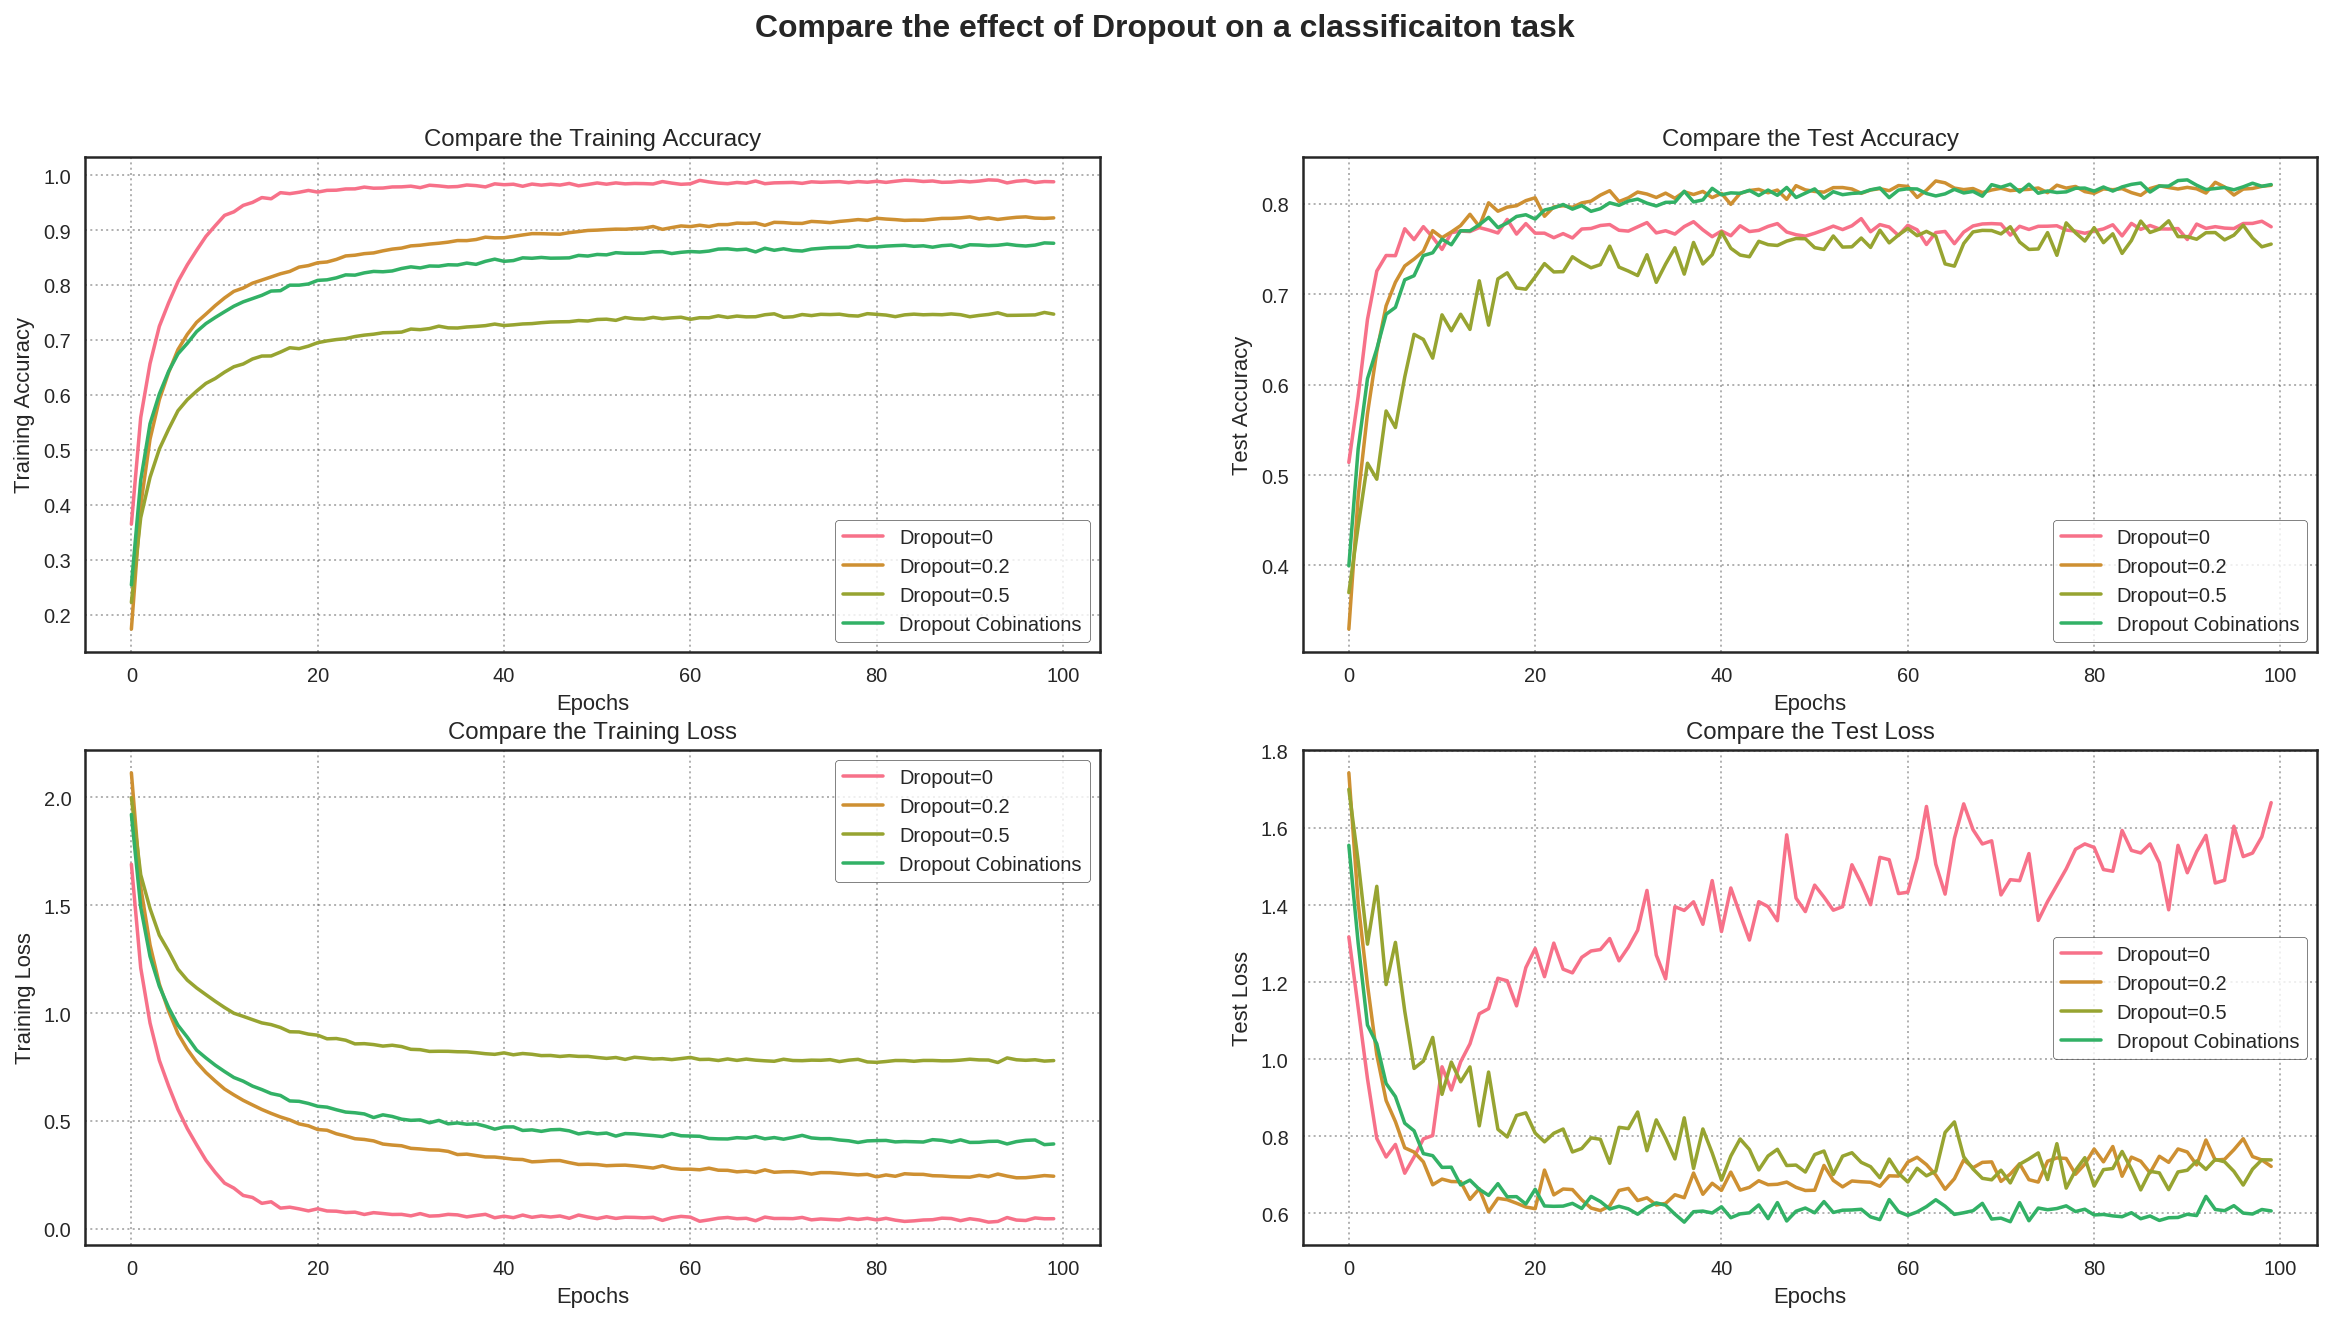

In [91]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
ax1.plot(model_1_history.history['acc'],color=colors[0],label='Dropout=0')
ax1.plot(model_2_history.history['acc'],color=colors[1],label='Dropout=0.2')
ax1.plot(model_3_history.history['acc'],color=colors[2],label='Dropout=0.5')
ax1.plot(model_4_history.history['acc'],color=colors[3],label='Dropout Cobinations')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy')


ax2.plot(model_1_history.history['val_acc'],color=colors[0],label='Dropout=0')
ax2.plot(model_2_history.history['val_acc'],color=colors[1],label='Dropout=0.2')
ax2.plot(model_3_history.history['val_acc'],color=colors[2],label='Dropout=0.5')
ax2.plot(model_4_history.history['val_acc'],color=colors[3],label='Dropout Cobinations')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy')


ax3.plot(model_1_history.history['loss'],color=colors[0],label='Dropout=0')
ax3.plot(model_2_history.history['loss'],color=colors[1],label='Dropout=0.2')
ax3.plot(model_3_history.history['loss'],color=colors[2],label='Dropout=0.5')
ax3.plot(model_4_history.history['loss'],color=colors[3],label='Dropout Cobinations')
ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss')


ax4.plot(model_1_history.history['val_loss'],color=colors[0],label='Dropout=0')
ax4.plot(model_2_history.history['val_loss'],color=colors[1],label='Dropout=0.2')
ax4.plot(model_3_history.history['val_loss'],color=colors[2],label='Dropout=0.5')
ax4.plot(model_4_history.history['val_loss'],color=colors[3],label='Dropout Cobinations')
ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss')

fig.suptitle('Compare the effect of Dropout on a classificaiton task',fontsize=16, fontweight='bold')
plt.show()